## 실습 설명
이번 프로젝트에서는 제주데이터허브에서 제공하는 공공 데이터를 활용해 볼 겁니다. 먼저 내국인의 지역/업종/연령대별 카드 이용 데이터를 분석할 건데요. 카드 매출액의 월별 추이는 어떤지, 업종별 비중은 어떤지, 연령대별로는 어떤 차이가 있는지 등 다양한 정보를 자유롭게 확인해 보시면 됩니다. 어떻게 해야 할지 잘 모르겠다면, 아래 가이드라인을 참고해서 코드를 작성해 보세요!

## 폰트 설정하기
그래프에서 한글 텍스트를 표현하려면 한글 지원 폰트가 필요한데요. 실습 환경에는 네이버에서 제공하는 나눔 글꼴(나눔고딕)이 설치되어 있습니다. 아래 코드를 통해 폰트를 나눔고딕으로 설정해 주세요.

plt.rc('font', family='NanumGothic')


가이드라인
1. 데이터 불러오기
data 폴더 안에 있는 jeju_card.csv 파일을 DataFrame으로 불러옵시다.
2. 데이터 탐색 및 전처리
데이터를 간단히 탐색하고 전처리해 봅시다.
데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.
각 컬럼이 어떤 값들로 이루어져 있는지 확인해 보세요.
2017년과 2018년의 데이터만 추출해 주세요.
3. 데이터 분석
연월별 카드 이용 추이를 비교해 보세요.
2017년과 2018년, 두 연도 사이에 어떤 차이가 있나요? 왜 그런 차이가 나는지도 한번 확인해 보세요.
연령대별로 카드 이용에 어떤 차이가 있는지 비교해 보세요.
이용자수, 소비금액, 1회당 소비금액을 비교해 보세요.
연령대별로 어떤 업종에 많은 금액을 지출하는지 확인해 보세요.
연령대별로 연월별 카드 이용 추이를 확인해 보세요.
더 알아보고 싶은 게 있다면 원하는 대로 자유롭게 데이터를 탐색해 보세요!


In [140]:
import pandas as pd
import matplotlib.pyplot as plt   # as in Pycharm
import seaborn as sns

from matplotlib import rc 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### 1. 데이터 불러오기

In [141]:
df = pd.read_csv('data/jeju_card.csv')
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
19568,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2016-09,1778,2059,79696179
19569,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2016-09,1441,1543,52066479
19570,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2016-09,2358,2606,87972936
19571,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2016-09,731,765,22788256


데이터 개수, 컬럼별 데이터 타입, 통계 정보, 결측값 존재 여부 등을 확인해 보세요.

### 2. 데이터 탐색 및 전처리

In [142]:
# 데이터 개수
df.shape

(19573, 11)

In [143]:
# 컬럼별 데이터 타입
df.dtypes

시도명       object
시군구명      object
지역구분      object
업종명       object
이용자 구분    object
연령대       object
성별        object
연월        object
이용자수       int64
이용횟수       int64
이용금액       int64
dtype: object

위에 있는 출력 결과를 보면, 데이터에 결측값은 없다.


이 함수는 기본적으로 숫자 데이터의 통계 정보 보여준다. 
다른 데이터 타입을 가진 컬럼들도 확인하고 싶다면, include라는 파라미터에 'all'이라는 값을 넘겨주면 된다.

In [144]:
# 통계 정보
df.describe(include='all')

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,제주도,제주시,도심,식음료,내국인관광객,50대,남,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


In [145]:
# 결측값 존재
df.isnull().sum()

시도명       0
시군구명      0
지역구분      0
업종명       0
이용자 구분    0
연령대       0
성별        0
연월        0
이용자수      0
이용횟수      0
이용금액      0
dtype: int64

각 컬럼이 어떤 값들로 이루어져 있는지 확인해 보세요.

In [146]:
object_columns = df.columns[df.dtypes == 'object']
object_columns

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월'], dtype='object')

In [147]:
for col in object_columns:
    print(col)
    print(df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 


In [148]:
# 2017년과 2018년의 데이터만 추출해 주세요.
df = df[df['연월'].str.contains('2017|2018')]
df

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600
...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900


연월별 카드 이용 추이를 비교해 보세요.
2017년과 2018년, 두 연도 사이에 어떤 차이가 있나요? 왜 그런 차이가 나는지도 한번 확인해 보세요.

In [149]:
year= df['연월'].str.split('-', n=1, expand=True)
df['연도']= year[0]
df

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_50825/1587863683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도']= year[0]


,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,제주도,서귀포시,도심,교통,내국인관광객,40대,남,2017-01,1891,2241,101651320,2017
16703,제주도,서귀포시,도심,교통,내국인관광객,30대,여,2017-01,1033,1138,36637253,2017
16704,제주도,서귀포시,도심,교통,내국인관광객,30대,남,2017-01,1570,1922,85201203,2017
16705,제주도,서귀포시,도심,교통,내국인관광객,20대,여,2017-01,593,631,18802900,2017


In [150]:
df.sort_values(by=['연월'],inplace=True)
df

/var/folders/vh/dzvlggfx64b5xndshnbz77540000gn/T/ipykernel_50825/2345510381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['연월'],inplace=True)


,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
16706,제주도,서귀포시,도심,교통,내국인관광객,20대,남,2017-01,694,759,23765936,2017
16230,제주도,제주시,도심,숙박,내국인관광객,20대,남,2017-01,568,634,37881774,2017
16229,제주도,제주시,도심,숙박,내국인관광객,20대,여,2017-01,566,655,47691443,2017
16228,제주도,제주시,도심,숙박,내국인관광객,30대,남,2017-01,1072,1348,112994553,2017
16227,제주도,제주시,도심,숙박,내국인관광객,30대,여,2017-01,774,957,86832222,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
443,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,남,2018-12,775,1014,72834494,2018
442,제주도,서귀포시,읍면,소매,내국인관광객,60대이상,여,2018-12,655,857,80525096,2018
441,제주도,서귀포시,읍면,소매,제주도민,20대,남,2018-12,278,492,11681404,2018
439,제주도,서귀포시,읍면,소매,제주도민,20대미만,남,2018-12,22,40,616270,2018


In [151]:
df.groupby('연월').sum(numeric_only=True)

,이용자수,이용횟수,이용금액
연월,,,
2017-01,2044697,3962878,158062633602
2017-02,1937989,3686906,142673272629
2017-03,2139087,4265024,158170622304
2017-04,2261037,4428571,164145266282
2017-05,2422539,4744952,174450463090
2017-06,2328383,4606602,166023890619
2017-07,2520117,5048178,177270011408
2017-08,2634037,5212389,178853518885
2017-09,2374142,4765159,168355520204


연월별로 이용자수, 이용횟수, 이용금액의 합계 계산 

지금은 연월이 인덱스 위치에 들어가 있다. 
좀 더 편리하게 그래프를 그릴 수 있도록, 
reset_index() 함수를 사용해서 연월을 컬럼 위치로 빼준 후 이 DataFrame은 groupby_ym이라는 변수에 담음

In [152]:
groupby_ym =  df.groupby('연월').sum(numeric_only=True).reset_index()
groupby_ym

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


<Axes: xlabel='연월', ylabel='이용금액'>

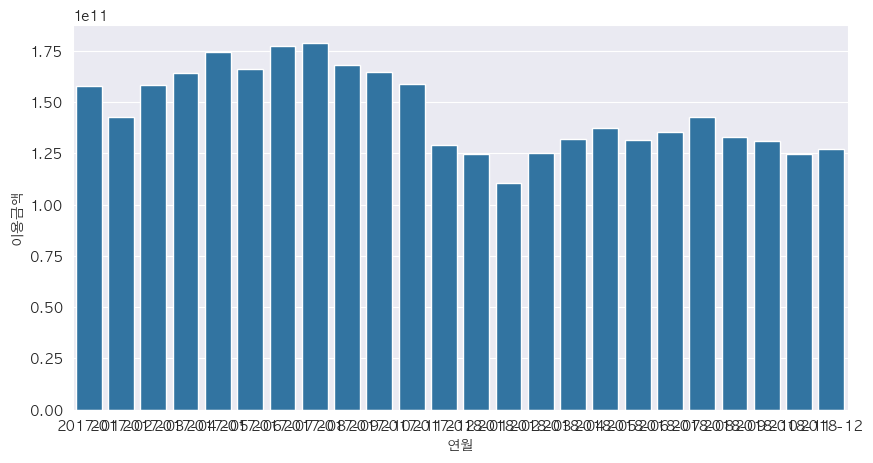

In [153]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')

아래와 같이 가로 10인치, 세로 5인치로 변경

X축을 plt.xticks(rotation=90)으로 90도로 회전
plt.title('연월별 카드 이용 금액') 제목추가

과학적 표기법(Scientific Notation)'이라는 방식으로 숫자를 표현한. 
여기서 1e11은 쉽게 말해, 왼쪽 눈금에 있는 값들에 10의 11 제곱을 곱하는 것을 의미 
예를 들어 지금 1.50은 실제로 
1.50 × 10^11, 즉 150,000,000,000(1,500억)

Text(0, 0.5, '이용금액(억)')

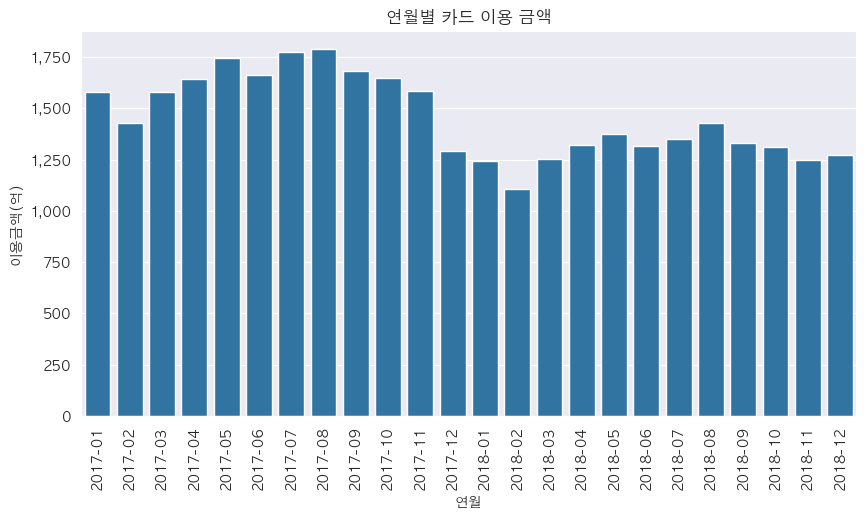

In [154]:
plt.rcParams['figure.figsize'] = (10, 5)


sns.barplot(data=groupby_ym, x='연월', y='이용금액')
plt.xticks(rotation=90)
plt.title('연월별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

### 3. 데이터 분석

## 2017년과 2018년의 이용 금액 비교
그렇다면 이렇게 연도별로 카드 이용 금액에 차이가 나는 이유는 무엇일까요? 일단, 1년 사이에 유독 카드 소비가 많이 줄어든 연령층이 있는지 확인해 볼 건데요. 그러면 먼저 연도와 연령대를 기준으로 데이터를 요약해서 볼 필요가 있습니다. 연도, 연령대 두 개의 컬럼을 기준으로 groupby를 해서 합계를 구한 뒤, 이번에도 마찬가지로 reset_index() 함수를 함께 써 줄게요.

In [155]:
df['연령대'].unique()

array(['20대', '30대', '40대', '50대', '20 미만', '60대이상', '20대미만'],
      dtype=object)

In [156]:
df.loc[df['연령대'] == '20 미만', '연령대'] = '20대미만'

In [157]:
df['연령대'].unique()

array(['20대', '30대', '40대', '50대', '20대미만', '60대이상'], dtype=object)

In [158]:
groupby_ym_age = df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
groupby_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4800559,9304114,208175160124
1,2017,20대미만,203078,429896,4996657612
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대,4262563,8714136,175770246392
7,2018,20대미만,216056,475236,5027234286
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

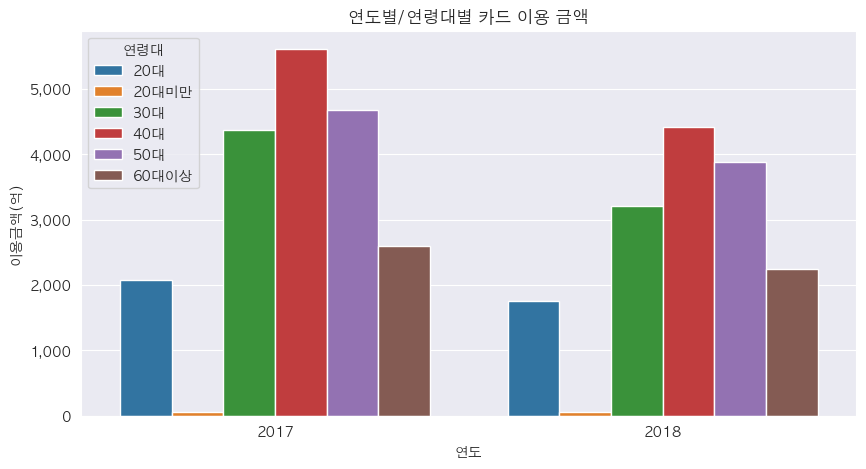

In [159]:
# 연령대별로 연월별 카드 이용 추이
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

지금 그래프를 보면, 특히 이용 금액이 더 많이 감소한 연령대는 없는 것 같습니다. 그냥 전체적으로 이용금액이 줄어들었다.

따라서 지금 연령대는 큰 상관이 없다고 볼 수 있다. 그렇다면 다른 원인을 찾아야한다.

In [160]:
groupby_ym_user = df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

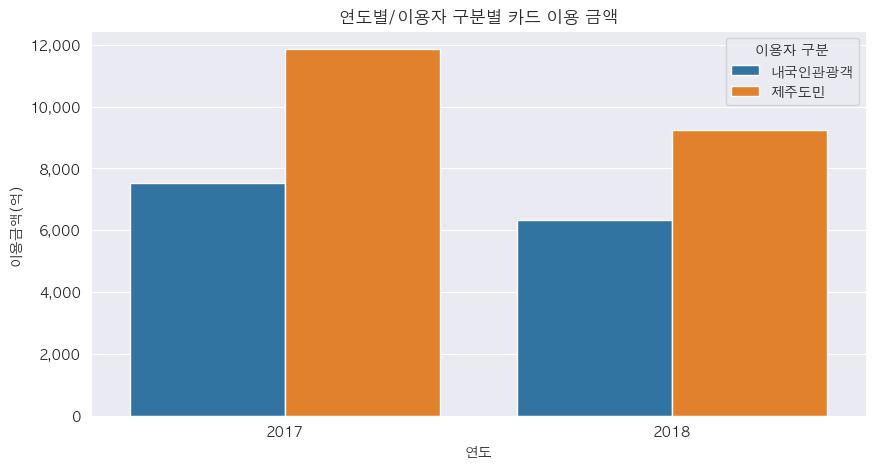

In [161]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

제주도민과 내국인관광객 모두 전체적으로 이용 금액이 감소

그러면 2017년에 비해 2018년에 특별히 이용 금액이 줄어든 업종이 있는지 확인

Text(0, 0.5, '이용금액(억)')

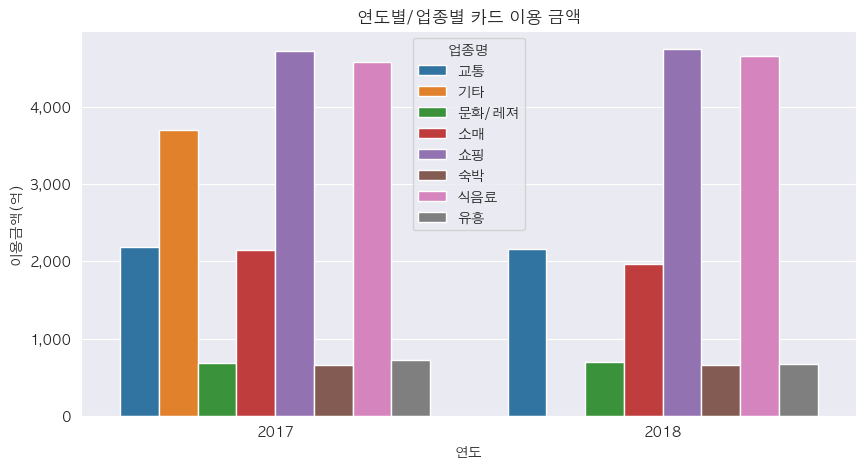

In [162]:
groupby_ym_market = df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')


그래프를 보면, 주황색으로 표시된 기타 항목이 2017년에만 있고 2018년에는 텅 비어 있다.
불린 인덱싱으로 업종명이 기타인 데이터만 가져와서 확인

In [163]:
df[df['업종명'] == '기타']

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
16320,제주도,제주시,도심,기타,내국인관광객,40대,여,2017-01,8272,13663,875310759,2017
16319,제주도,제주시,도심,기타,내국인관광객,50대,남,2017-01,10550,20580,852466590,2017
16318,제주도,제주시,도심,기타,내국인관광객,50대,여,2017-01,4105,6828,437375705,2017
16317,제주도,제주시,도심,기타,내국인관광객,60대이상,남,2017-01,2920,5039,348926313,2017
16316,제주도,제주시,도심,기타,내국인관광객,60대이상,여,2017-01,1432,2472,134693759,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9215,제주도,서귀포시,읍면,기타,내국인관광객,20대미만,남,2017-11,34,98,726400,2017
9214,제주도,서귀포시,읍면,기타,내국인관광객,20대미만,여,2017-11,27,84,422600,2017
9213,제주도,서귀포시,읍면,기타,내국인관광객,20대,남,2017-11,650,828,17976440,2017
9212,제주도,서귀포시,읍면,기타,내국인관광객,20대,여,2017-11,667,783,13367630,2017


아래와 같이 연월 컬럼의 unique 한 값을 확인해 보면, 업종명이 기타인 데이터에는 2017년 1월부터 2017년 11월까지만 있다.
즉, 2017년 12월부터 '기타' 업종의 데이터가 누락되어 있다고 추측할 수 있다.

In [164]:
df[df['업종명'] == '기타']['연월'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11'],
      dtype=object)

## 업종명 컬럼 전처리
이렇게 거의 반 이상이 누락되어 있는 기타 업종의 데이터에 대해서는 제대로 된 분석을 하기가 어렵다. 
따라서 업종명이 '기타'인 것들은 제외한다.

In [165]:
jeju_card_df = df[df['업종명'] != '기타']

이제 새로운 데이터를 가지고, 연도/연령대별, 연도/이용자 구분별, 연도/업종별 그래프를 하나씩 다시 그려 보겠습니다.

Text(0, 0.5, '이용금액(억)')

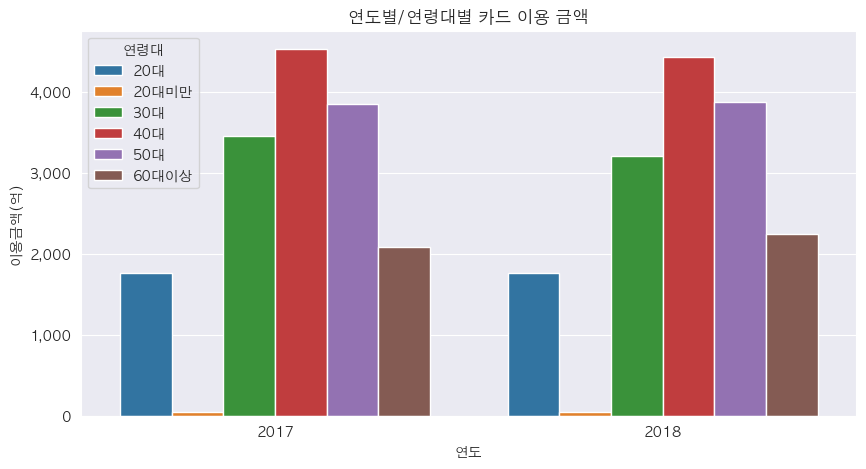

In [166]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

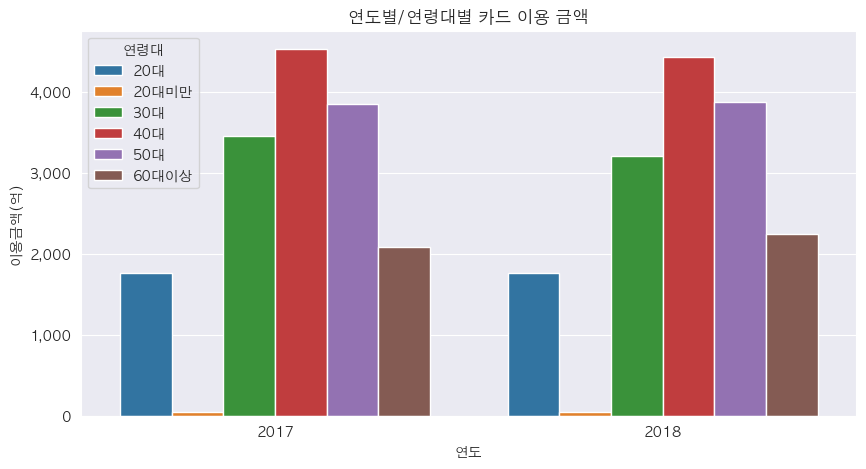

In [167]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

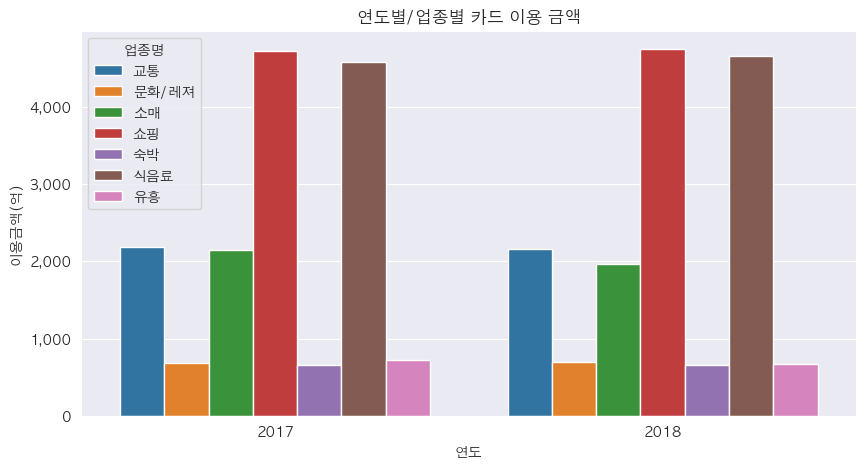

In [168]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

## 연령대별 이용 금액 시각화
이번에는 연령대별 카드 이용 금액을 비교해 봅시다. 일단 연령대 컬럼을 기준으로 groupby를 한 뒤 sum()으로 합계를 구하고 reset_index()를 써서 연령대를 다시 컬럼 위치로 되돌려 줄게요.




In [169]:
groupby_age = jeju_card_df.groupby('연령대').sum(numeric_only=True).reset_index()
groupby_age

,연령대,이용자수,이용횟수,이용금액
0,20대,8609569,17330083,352340324557
1,20대미만,401769,879205,9478228519
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

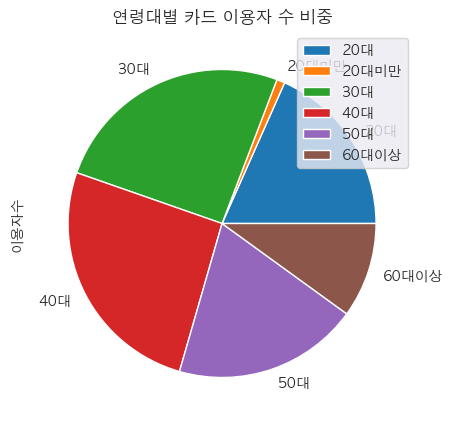

In [170]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'])
plt.title('연령대별 카드 이용자 수 비중')

여기서 autopct는 automatic percentage의 줄임말로, 각 조각의 비중(percentage)을 자동으로 계산해 주는 역할을 합니다. 그리고 이 파라미터에 넘겨주는 값은 각 비중을 어떤 형식으로 표시할 건지를 나타내죠. 참고로, %.1f%는 25.3%, 21.5% 이런 식으로 소수 첫째 자리까지 표현된 숫자값 뒤에 % 기호를 붙인 형태를 의미합니다.

Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

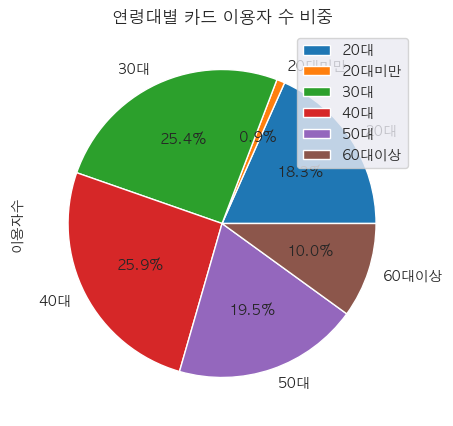

In [171]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')

이제 파이 차트와 범례가 겹치지 않게하기

그다음에는 이용 금액의 연령대별 비중 확인

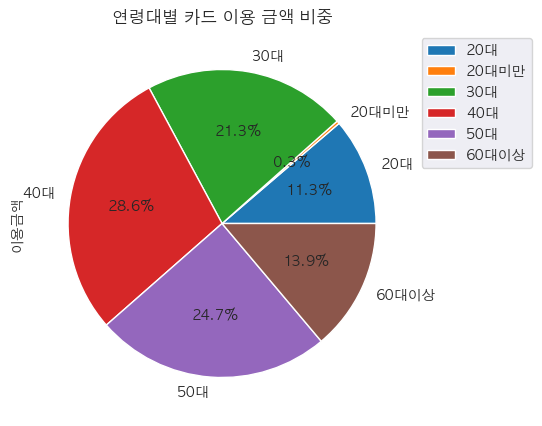

In [173]:
groupby_age.plot(kind='pie', y='이용금액', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용 금액 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

이용자 수와 비교했을 때 연령대별 비중에 차이가 좀 있다.
20대와 30대는 이용자 수에 비해 이용 금액의 비중은 비교적 작고, 50대와 60대 이상은 이용자 수에 비해 이용 금액의 비중이 큰 것 같다.

그렇다면 인당 이용 금액으로 환산해 보기
이용금액 컬럼을 이용자수 컬럼으로 나눠서 인당이용금액이라는 컬럼을 새로 만들어 준다.

In [176]:
groupby_age['인당이용금액'] = groupby_age['이용금액'] / groupby_age['이용자수']
groupby_age

,연령대,이용자수,이용횟수,이용금액,인당이용금액
0,20대,8609569,17330083,352340324557,40924.269793
1,20대미만,401769,879205,9478228519,23591.239043
2,30대,11943645,23231348,665648456005,55732.438130
3,40대,12151108,25588896,894568725640,73620.341918
4,50대,9141502,18600897,771684016455,84415.451252
5,60대이상,4683296,9062038,433293299324,92518.879721


Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

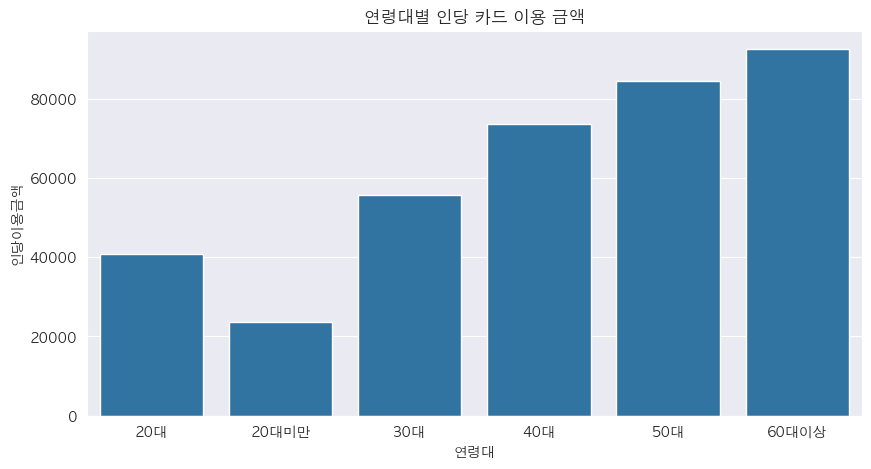

In [177]:
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

연령대가 높아질수록 인당 소비액은 더 많아진다는 걸 알 수 있다. 

y축을 보기쉽게 변경

Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

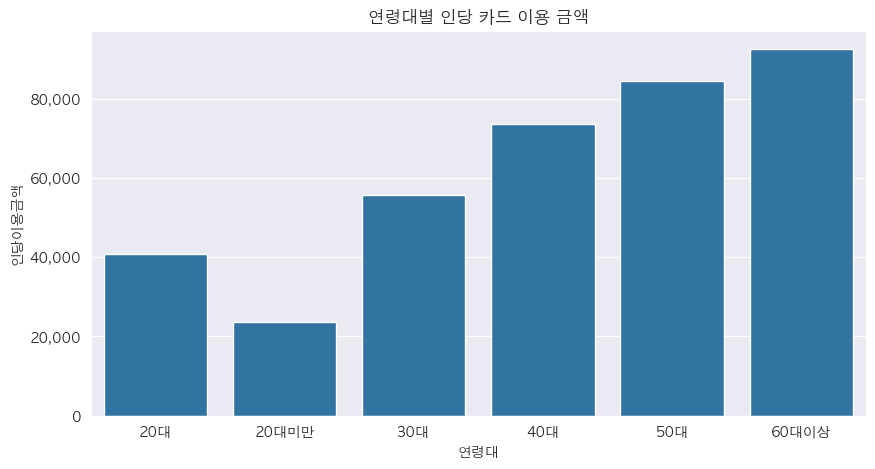

In [179]:
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

## 연령대별/업종별 이용 금액 시각화

In [180]:
groupby_age_market = jeju_card_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
groupby_age_market.head()


,연령대,업종명,이용자수,이용횟수,이용금액
0,20대,교통,691799,832507,45278277733
1,20대,문화/레져,450991,749958,12465321269
2,20대,소매,832913,1125058,37445127141
3,20대,쇼핑,3000168,8049427,102068652646
4,20대,숙박,189642,232654,13115450664


Text(0.5, 1.0, '연령대별/업종별 인당 카드 이용 금액')

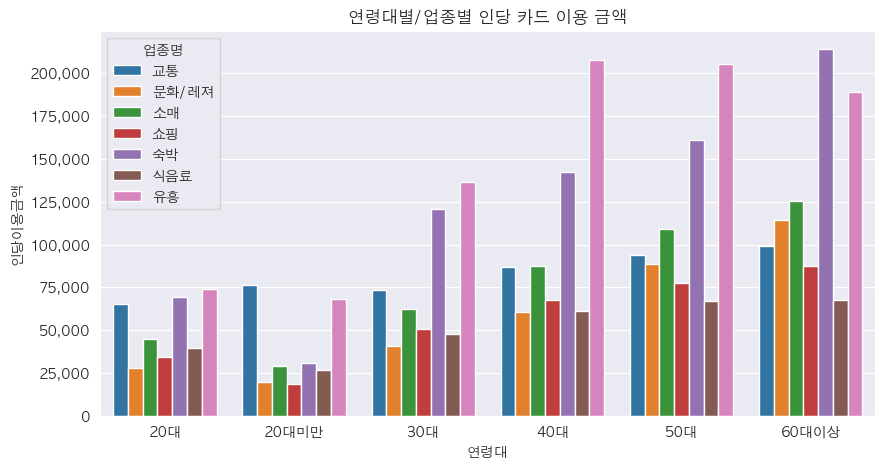

In [181]:
groupby_age_market['인당이용금액'] = groupby_age_market['이용금액'] / groupby_age_market['이용자수']

sns.barplot(data=groupby_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('연령대별/업종별 인당 카드 이용 금액')

## 연령대별/연월별 이용 금액 시각화

<Axes: xlabel='연령대', ylabel='이용자수'>

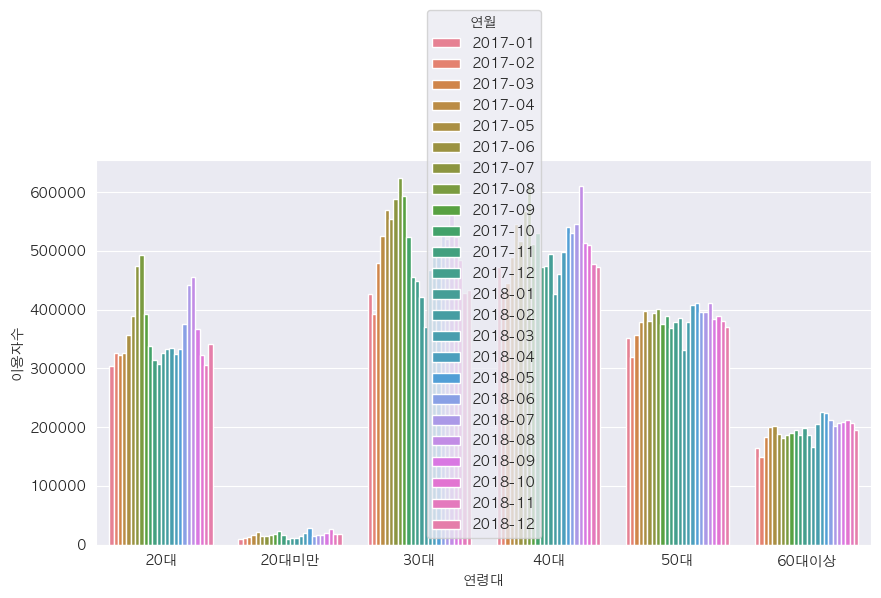

In [182]:
groupby_age_ym = jeju_card_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
sns.barplot(data=groupby_age_ym, x='연령대', y='이용자수', hue='연월')